<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The print_function import is not needed in Python 3
#from future import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [6]:
# Importing the dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
# Printing the training and testing shape
print('Training data shape :', train_images.shape, train_labels.shape)
print('Testing data shape :', test_images.shape, test_labels.shape)

Training data shape : (50000, 32, 32, 3) (50000, 1)
Testing data shape : (10000, 32, 32, 3) (10000, 1)


In [9]:
# Find unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

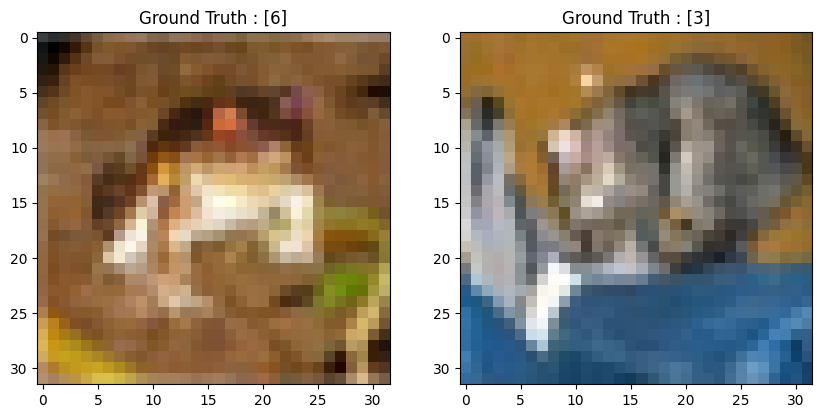

In [10]:
# Plots
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [12]:
# reshaping the data
nRows, nCols, nDims = train_images.shape[1:]
train_images = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_images = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape = (nRows, nCols, nDims)

train_data = train_images.astype('float32')
test_data = test_images.astype('float32')


In [13]:
# Normalizing the data
train_data /= 255
test_data /= 255

In [14]:
# One Hot Encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [17]:
# Displaying target variable
print('Original label 0 :' , train_labels[0])
print('After conversion to categorical (One-hot) : ', train_labels_one_hot[0])

Original label 0 : [6]
After conversion to categorical (One-hot) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
# Displaying target variable
print('Original label 0 :' , train_labels[1])
print('After conversion to categorical (One-hot) : ', train_labels_one_hot[1])

Original label 0 : [9]
After conversion to categorical (One-hot) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [19]:
# Designing the architecture of the neural network
def createModel():
  model = Sequential()
 # The First 2 layers  with 32 filters of the window size 3*3
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))
  return model

In [20]:
# Model COmpiling process
model1 = createModel()
batch_size = 256
epochs = 10
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Evaluating the model
model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Fitting the model
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.2830 - loss: 1.9307 - val_accuracy: 0.5009 - val_loss: 1.3713
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.5110 - loss: 1.3542 - val_accuracy: 0.6059 - val_loss: 1.1428
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.5898 - loss: 1.1538 - val_accuracy: 0.6330 - val_loss: 1.0334
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.6315 - loss: 1.0373 - val_accuracy: 0.6793 - val_loss: 0.9103
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6720 - loss: 0.9368 - val_accuracy: 0.6954 - val_loss: 0.8715
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.6933 - loss: 0.8749 - val_accuracy: 0.7261 - val_loss: 0.7815
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7225 - loss: 0.7925 - val_accuracy: 0.7399 - val_loss: 0.7432
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7395 - loss: 0.7456 - val_accu

In [23]:
# Evaluating the performance  of the model on testing data
model1.evaluate(test_data, test_labels_one_hot, verbose=0)

[0.6734611392021179, 0.7685999870300293]

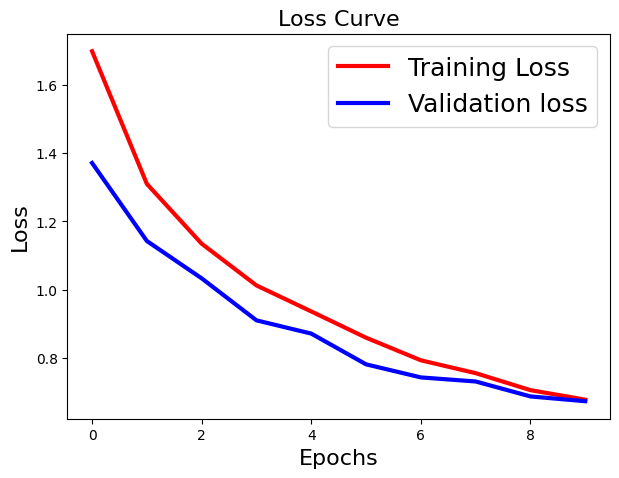

In [26]:
# Loss Curves
plt.figure(figsize = (7,5))
plt.plot(history.history['loss'], 'r', linewidth = 3.0)
plt.plot(history.history['val_loss'], 'b', linewidth = 3.0)
plt.legend(['Training Loss', 'Validation loss'], fontsize = 18)
plt.ylabel('Loss', fontsize = 16)
plt.xlabel('Epochs', fontsize = 16)
plt.title('Loss Curve', fontsize = 16)
plt.show()

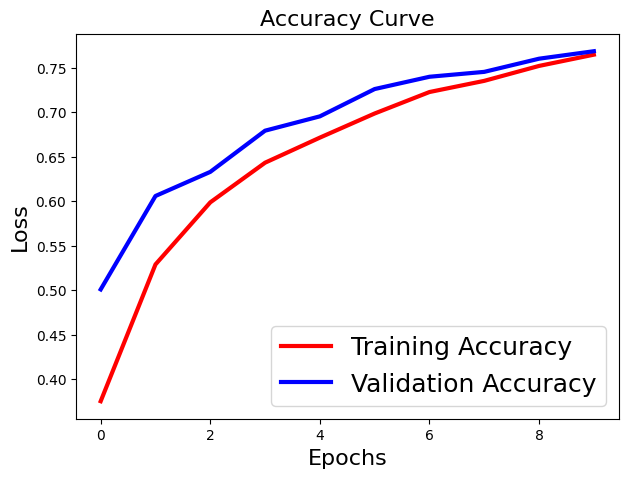

In [27]:
# Accuracy Curves
plt.figure(figsize = (7,5))
plt.plot(history.history['accuracy'], 'r', linewidth = 3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth = 3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)
plt.ylabel('Loss', fontsize = 16)
plt.xlabel('Epochs', fontsize = 16)
plt.title('Accuracy Curve', fontsize = 16)
plt.show()